# k-Nearest Neighbor

In [1]:
# kirjastot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
# naapureiden määrä
n_neighbors = 15

# datan lataus
iris = datasets.load_iris()

x = iris.data[:, :2]
y = iris.target

h = .02

In [3]:
# luodaan värit
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [6]:
for weights in ["uniform", "distance"]:
    # luodaan luokitin
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(x, y)
    
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    z = clf.predict( np.c_[ xx.ravel(), yy.ravel() ] )
    z = z.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap = cmap_light)
    
    plt.scatter(x[:, 0], x[:, 1], c = y, cmap = cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3k naapuri (k = %i, weight = '%s')" % (n_neighbors, weights))

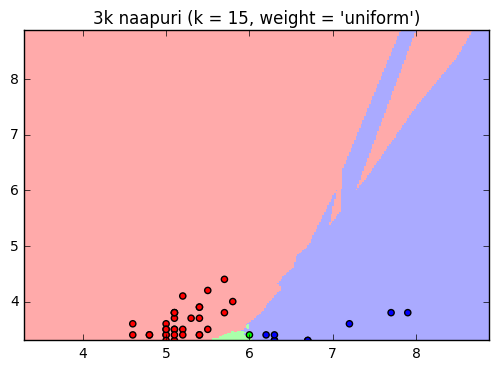

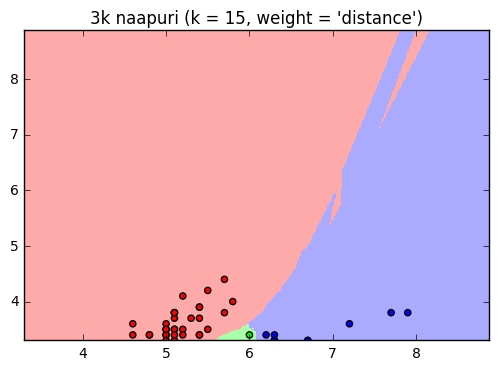

In [5]:
plt.show()